<a href="https://colab.research.google.com/github/dannyoo/Data-Analytics-Playground/blob/master/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-Means Flowers

In [0]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('../content/Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

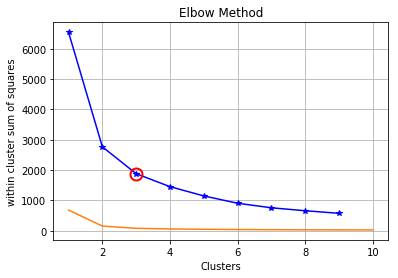

In [0]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
K = range(1,10)
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('within cluster sum of squares')
plt.show()

In [0]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

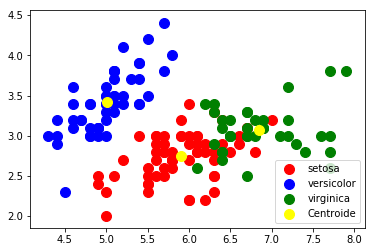

In [0]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroide')

plt.legend()

# Random Forest Flowers

In [0]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier as rf

np.random.seed(0)

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0,1,len(df))<= .65

train, test = df[df['is_train']==True],df[df['is_train']==False]

print("observations in train data:", len(train))
print("observations in test data:", len(test))

observations in train data: 97
observations in test data: 53


In [0]:
features = df.columns[:4]
num_species = pd.factorize(train['species'])[0]

model = rf(n_jobs = 2, random_state = 0)
model.fit(train[features], num_species)
model.predict(test[features])

print(model.predict_proba(test[features])[0:10])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
print(clf.feature_importances_)

[0.04458199 0.06125136 0.13695199 0.03249622 0.03517985 0.00143389
 0.08463639 0.01532433 0.05808014 0.05268808 0.00176316 0.
 0.         0.07685332 0.04546645 0.         0.00124306 0.
 0.01420835 0.00454941 0.01058146 0.00023627 0.         0.00758013
 0.01817317 0.00124842 0.00021043 0.         0.00122291 0.00032628
 0.00398026 0.00220485 0.11591506 0.15804736 0.01356539 0.        ]


In [0]:
names = iris.target_names[model.predict(test[features])]
print(names[0:5])
print(test['species'].head())

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
1     setosa
7     setosa
8     setosa
10    setosa
13    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]


Accurate prediction.